1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

[0.0018363  0.01156872 0.03644147 0.07652708 0.12053016 0.151868
 0.1594614  0.14351526 0.11301827 0.07911279 0.04984105 0.02854533
 0.0149863  0.00726259 0.00326817 0.00137263 0.00054047]


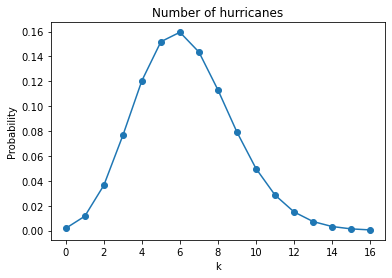

In [1]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

z = 3
#sigma_mu = (x0 - mu)/z

k = np.arange(0, 17)

pmf = stats.poisson.pmf(k, mu=6.3)

print(pmf)

plt.plot(k, pmf, marker='o')
plt.xlabel('k')
plt.ylabel('Probability')
plt.title("Number of hurricanes")

plt.show()

[0.0018363  0.01340502 0.04984649 0.12637358 0.24690373 0.39877173
 0.55823313 0.70174838 0.81476665 0.89387943 0.94372049 0.97226582
 0.98725212 0.99451471 0.99778288 0.99915551 0.99969598]


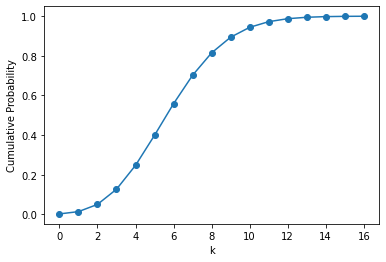

The porbability of observing more than 15 hurricanes is: 0.08444930803583883
p-value = 0.0026997960632601965
Reject null hypothesis


In [2]:
cdf = stats.poisson.cdf(k, mu=6.3)

print(cdf)

Z = 3.

# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
# note that you can surely perform an integral of stats.norm.pdf, but using the cdf is much more convenient

plt.plot(k, cdf, marker='o')
plt.xlabel('k')
plt.ylabel('Cumulative Probability')

plt.show()

prob = (1. - cdf[15])*100.

print("The porbability of observing more than 15 hurricanes is:", prob)

print("p-value =", pvalue)

if pvalue > 0.05:
    print("Retain null hypothesis")
elif pvalue < 0.05:
    print("Reject null hypothesis")

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T= 3.786997938137629


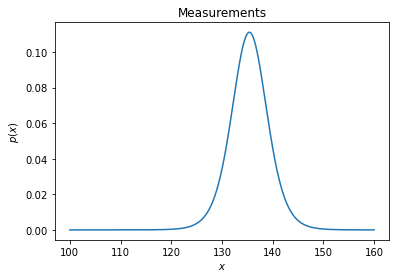

In [3]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = 10

mean_pre = np.mean(pre)
mean_post = np.mean(post)

sigma_pre = np.sqrt(np.var(pre, ddof=1))
sigma_post = np.sqrt(np.var(post, ddof=1))

sigma = np.sqrt((sigma_pre**2.+sigma_post**2.)/2.)

T = np.abs((mean_pre-mean_post))/(sigma*np.sqrt(2./n))
print("T=", T)

x = np.linspace(100, 160, 1000)
y = stats.t.pdf(x, loc=mean_post, scale=sigma / np.sqrt(n), df=n - 1)
plt.plot(x, y)
plt.title("Measurements")
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

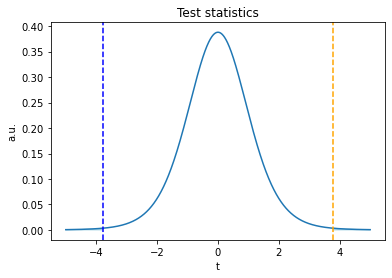

p-value = 1.9956975358671354
Retain null hypothesis: the change in blood pressures within our sample was statistically significant


In [4]:
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)

if pvalue > 0.05:
    print("Retain null hypothesis: the change in blood pressures within our sample was statistically significant")
elif pvalue < 0.05:
    print("Reject null hypothesis")

3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

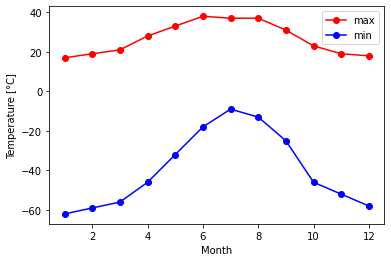

In [5]:
from scipy import optimize

tmax = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
tmin = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

month = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

plt.plot(month, tmax, marker='o', color='r', label='max')
plt.plot(month, tmin, marker='o', color='b', label='min')
plt.legend()
plt.ylabel('Temperature [°C]')
plt.xlabel('Month')
plt.show()

In [6]:
# fit by means of curve_fit
# p0 is a list of the initial guessed values for the parameters

def f(x, A, nu, B):
    return A * np.sin((nu + x)*2.*np.pi/x.max()) + B # sine function with amplitude A and angular frequency

popt1, pcov1 = optimize.curve_fit(f, month, tmax, full_output=False)
popt2, pcov2 = optimize.curve_fit(f, month, tmin, full_output=False)
print("parameters:\n", popt1)
print("covariance matrix:\n", pcov1)
print("A = %.2f +- %.2f" % (popt1[0], np.sqrt(pcov1[0,0])))
print("f = %.2f +- %.2f" % (popt1[1], np.sqrt(pcov1[1,1])))
print("B = %.2f +- %.2f" % (popt1[2], np.sqrt(pcov1[2,2])))

print("parameters:\n", popt2)
print("covariance matrix:\n", pcov2)
print("A = %.2f +- %.2f" % (popt2[0], np.sqrt(pcov2[0,0])))
print("f = %.2f +- %.2f" % (popt2[1], np.sqrt(pcov2[1,1])))
print("B = %.2f +- %.2f" % (popt2[2], np.sqrt(pcov2[2,2])))

parameters:
 [-10.9325495   -9.72348005  26.75      ]
covariance matrix:
 [[ 3.17151229e-01 -2.29463308e-09 -8.64559815e-10]
 [-2.29463308e-09  9.67890537e-03 -1.18662801e-10]
 [-8.64559815e-10 -1.18662801e-10  1.58575615e-01]]
A = -10.93 +- 0.56
f = -9.72 +- 0.10
B = 26.75 +- 0.40
parameters:
 [-25.58169521 -22.15603649 -39.66666667]
covariance matrix:
 [[ 3.26162755e+00 -2.27309888e-08  1.24069034e-08]
 [-2.27309888e-08  1.81793574e-02 -2.81401351e-10]
 [ 1.24069034e-08 -2.81401351e-10  1.63081379e+00]]
A = -25.58 +- 1.81
f = -22.16 +- 0.13
B = -39.67 +- 1.28


Fit is reasonable
The time offset is not the same within the fit accuracy


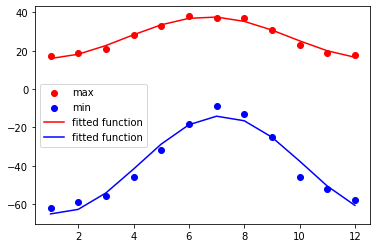

In [7]:
plt.scatter(month, tmax, label='max', color='red')
plt.scatter(month, tmin, label='min', color='blue')
plt.plot(month, f(month, popt1[0], popt1[1], popt1[2]), color='red', label='fitted function')
plt.plot(month, f(month, popt2[0], popt2[1], popt2[2]), color='blue', label='fitted function')
plt.legend(loc='best')

print('Fit is reasonable')
print('The time offset is not the same within the fit accuracy')

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [8]:
import pandas as pd

filename = "./data/residuals_261.pkl"

unpickled = pd.read_pickle(filename).tolist()
df = pd.DataFrame.from_dict(unpickled)
print(df)
data=df.iloc[:,0].values
#print(data)

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]


parameters:
 [8.75898550e+04 7.64712191e+00]
covariance matrix:
 [[ 5.33149565e+04 -1.46867711e+02]
 [-1.46867711e+02  1.19749917e+01]]
A = 87589.86 +- 230.90
B = 7.65 +- 3.46


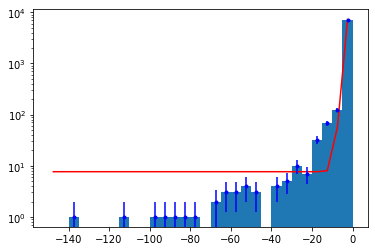

In [9]:
bins = [-150,-145,-140,-135,-130,-125,-120,-115,-110,-105,-100,-95,-90,-85,-80,-75,-70,-65,-60,-55,-50,-45,-40,-35,-30,-25,-20,-15,-10,-5,0]
y, binEdges = np.histogram(data,bins=bins)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
error = np.sqrt(y)

def f(x, A, B):
    return (A*np.exp(x)+B)

popt1, pcov1 = optimize.curve_fit(f, bincenters, y, full_output=False)
print("parameters:\n", popt1)
print("covariance matrix:\n", pcov1)
print("A = %.2f +- %.2f" % (popt1[0], np.sqrt(pcov1[0,0])))
print("B = %.2f +- %.2f" % (popt1[1], np.sqrt(pcov1[1,1])))

plt.hist(data, bins=bins)
plt.plot(bincenters, f(bincenters, popt1[0], popt1[1]), color='red', label='fitted function')
plt.yscale('log')
plt.errorbar(bincenters, y, yerr=error, fmt='.', color='b')
plt.show()

In [10]:
ssr = np.sum((y - (popt1[0]*np.exp(bincenters)+popt1[1]))**2) #estimated y -data
tss = np.sum((np.mean(y) - y)**2)

rsq = 1 - ssr / tss

print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(bincenters,y)) # check with the correlation matrix that R is the correlation coefficient

R2 = 0.9998054572345418 
R = 0.9999027238859497
Covariance matrix:
 [[1.         0.32081314]
 [0.32081314 1.        ]]


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [11]:
import pandas as pd

datafile = "./data/munich_temperatures_average_with_bad_data.txt"

year, temp = np.loadtxt(datafile, unpack=True)

condition1 = year >= 2008
condition2 = year <= 2012
condition3 = temp <= 98
year = year[condition1 & condition2 & condition3]
temp = temp[condition1 & condition2 & condition3]

Text(0, 0.5, 'temperature [°C]')

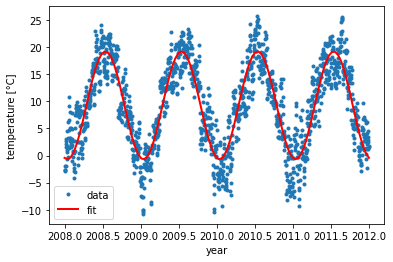

In [12]:
from scipy.optimize import curve_fit

def fit_fun(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

popt, pcov = curve_fit(fit_fun, year, temp)

plt.plot(year, temp, '.', label='data')
xfine = np.linspace(2008, 2012, 100)
plt.plot(xfine, fit_fun(xfine, *popt), color='red', lw=2, label='fit')
plt.legend()
plt.xlabel('year')
plt.ylabel('temperature [°C]')

In [13]:
print("parameters:\n", popt)
print("covariance matrix:\n", pcov)
print("\nBest fit parameters: \n")
print("a = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("b = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("c = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))

parameters:
 [-9.96203468 12.33174286  9.26282131]
covariance matrix:
 [[ 1.75558202e-02  9.85997234e-07 -2.76510773e-06]
 [ 9.85997234e-07  1.77326375e-04  5.40544097e-08]
 [-2.76510773e-06  5.40544097e-08  8.78853325e-03]]

Best fit parameters: 

a = -9.96 +- 0.13
b = 12.33 +- 0.01
c = 9.26 +- 0.09


In [14]:
t_mean = np.mean(temp)

print('Avg temp: %.2f'% t_mean)

t_cold = temp
y_cold = year
c_cold = temp <= 0
t_cold = t_cold[c_cold]
y_cold = y_cold[c_cold]
t_cold_mean = np.mean(t_cold)

t_hot = temp
y_hot = year
c_hot = temp >= 15
t_hot = t_hot[c_hot]
y_hot = y_hot[c_hot]
t_hot_mean = np.mean(t_hot)

print('\nThe typical daily average values predicted by the model for the coldest and hottest time of year are:\n %.2f, %.2f'% (t_cold_mean, t_hot_mean))
print("\nThe b parameter is a shift in phase, it means that during the years the temperature shifts in time")

Avg temp: 9.26

The typical daily average values predicted by the model for the coldest and hottest time of year are:
 -3.35, 18.61

The b parameter is a shift in phase, it means that during the years the temperature shifts in time


Text(0, 0.5, 'temperature [°C]')

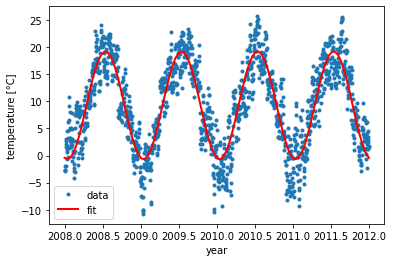

In [15]:
def fit_fun_g(t, a, b, c, d):
    return a * np.cos(2 * np.pi * t * b + c) + d

popt1, pcov1 = curve_fit(fit_fun_g, year, temp)

plt.plot(year, temp, '.', label='data')
xfine = np.linspace(2008, 2012, 100)
plt.plot(xfine, fit_fun_g(xfine, *popt1), color='red', lw=2, label='fit')
plt.legend()
plt.xlabel('year')
plt.ylabel('temperature [°C]')

In [16]:
print("parameters:\n", popt1)
print("covariance matrix:\n", pcov1)
print("\nBest fit parameters: \n")
print("a = %.2f +- %.2f" % (popt1[0], np.sqrt(pcov1[0,0])))
print("b = %.2f +- %.2f" % (popt1[1], np.sqrt(pcov1[1,1])))
print("c = %.2f +- %.2f" % (popt1[2], np.sqrt(pcov1[2,2])))
print("d = %.2f +- %.2f" % (popt1[3], np.sqrt(pcov1[3,3])))

parameters:
 [-9.96073746  1.00029351  8.62489374  9.26567501]
covariance matrix:
 [[ 1.77591292e-02 -2.63811494e-05  3.33179181e-01 -2.64218130e-04]
 [-2.63811494e-05  3.54897833e-06 -4.48214486e-02  3.44906852e-05]
 [ 3.33179182e-01 -4.48214486e-02  5.66067949e+02 -4.35596306e-01]
 [-2.64218131e-04  3.44906852e-05 -4.35596306e-01  9.12963714e-03]]

Best fit parameters: 

a = -9.96 +- 0.13
b = 1.00 +- 0.00
c = 8.62 +- 23.79
d = 9.27 +- 0.10


SSR: 18669.51539457836 18669.225430551494
p-value: 0.901 , additional parameter necessary: NO


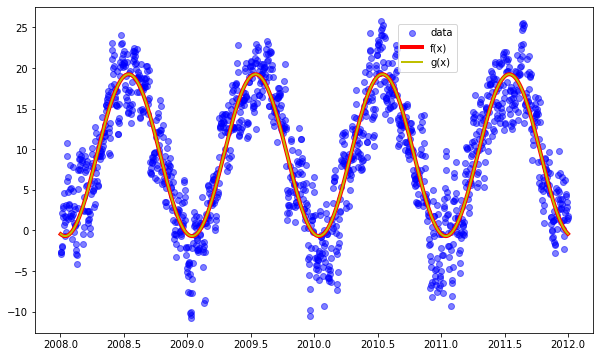

In [17]:
# define alpha
alpha = 0.05 # note that alpha could also be 0.10

# define a function that performes the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval

# plot
fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.scatter(x=year, y=temp, marker='o', c='blue', label="data", alpha=.5)

(fa0, fa1, fa2), cov = curve_fit(fit_fun, year, temp)
y2 = fit_fun(year, fa0, fa1, fa2)
ax.plot(year, y2, color='r', label="f(x)", linewidth=4)
ssr_2 = np.sum((y2 - temp)**2)
ndof_2 = 3 - 1 # n of parameters - 1

(fa0, fa1, fa2, fa3), cov =curve_fit(fit_fun_g, year, temp)
y3 = fit_fun_g(year, fa0, fa1, fa2, fa3)
ax.plot(year, y3, color='y', label="g(x)", linewidth=2)
ssr_3 = np.sum((y3 - temp)**2)
ndof_3 = 4 - 1 # n of parameters - 1

ax.legend(loc=(0.65, 0.8))

print("SSR:", ssr_2, ssr_3)

# run F-test
pval_2_vs_3 = Ftest(ssr_2, ssr_3, ndof_2, ndof_3, 1000, verbose=True)